In [1]:
from data_utils import load_data,flatten_data
from model_utils import model_pipeline,plot_history
import numpy as np
from middle_model import cnn_normal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_participant_num = ["C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P300D","P336D","P492D","P492N","P531N","P699D","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

In [3]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

In [4]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(4286, 180, 70) (array([0., 1.], dtype=float32), array([ 844, 3442]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/50


/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-03-20 21:32:26.940771: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 7s 689ms/step - loss: 10.5532 - binary_accuracy: 0.6321 - val_loss: 1.5933 - val_binary_accuracy: 0.8538 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/50
9/9 [==============================] - 6s 640ms/step - loss: 2.5888 - binary_accuracy: 0.7092 - val_loss: 7.6665 - val_binary_accuracy: 0.5749 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/50
9/9 [==============================] - 6s 674ms/step - loss: 1.6252 - binary_accuracy: 0.7505 - val_loss: 3.2671 - val_binary_accuracy: 0.6121 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/50
9/9 [==============================] - 6s 632ms/step - loss: 1.3277 - binary_accuracy: 0.6899 - val_loss: 1.3219 - val_binary_accuracy: 0.6745 - lr: 5.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 

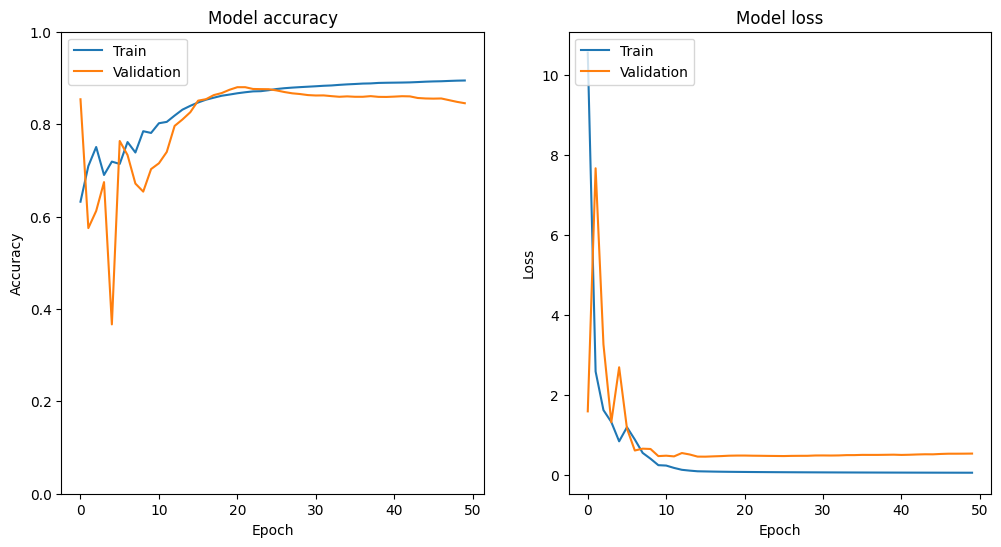

In [5]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]
model = cnn_normal(input_shape,num_classes)
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid, epoch=50)
plot_history(H)